### Documentation:
#### Data Set:8.twospirals


### Data Description:
- The dataset consists of three columns and 2000 rows which includes two feature columns and one label column. 
- Features columns are in the form of float and continuous values ranges from [-9.462311 to 9.659887] and [-11.017154  to  11.227412] and the means are at [0.930868 and 1.855540].
- Whereas label is in the form discreate numerical float values that includes [0 and 1], 50% of the data consists of 0 and rest   consists of 1 as labels. 
- There are zero duplicates and no null values consists in the dataset. 
- Pattern that is formed by the input features is two spiral. 
- That means one spiral is indicating 0 and another one is 1.


### Importing Libraries: The required libraries are imported at the beginning of the code.


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the Dataset:
The code reads a CSV file using Pandas, assuming the file is located at "C:\\Users\\dell\\Downloads\\Deep Learning data\\8.twospirals.csv". The dataset is stored in the DataFrame df.

In [178]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Deep Learning data\\8.twospirals.csv",header = None)
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


#### Gives the dimensions of the dataset (number of rows, number of columns).


In [179]:
df.shape

(2000, 3)

#### Provides information about the dataset, including the data types of each column and the number of non-null values.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [181]:
df.describe()

,0,1,2
count,2000.000000,2000.000000,2000.000000
mean,0.035789,0.170252,0.500000
std,5.580847,6.480102,0.500125
min,-9.462311,-11.017154,0.000000
25%,-4.589943,-4.790316,0.000000
50%,-0.126161,0.039630,0.500000
75%,4.835311,5.460470,1.000000
max,9.659887,11.227412,1.000000


In [80]:
df[2]

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: 2, Length: 2000, dtype: int64

In [182]:
df.duplicated().sum()

0

In [183]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [184]:
df[2].value_counts()

0    1000
1    1000
Name: 2, dtype: int64

### Data Visualization:
A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

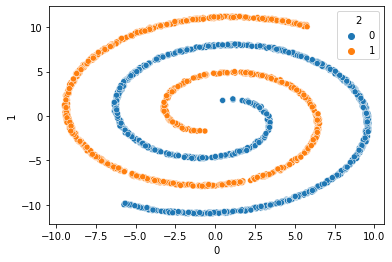

In [81]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 10% of the total dataset.

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

### Data Preprocessing:
The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [84]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)

### Importing necessary libraries:
- TensorFlow and Keras are libraries.
- Sequential is a linear stack of neural network layers.
- Dense represents a fully connected layer.

In [83]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Model Architecture:

- The model is defined as a sequential model, which means the layers are stacked sequentially.
- The input layer has 2 neurons, and the first hidden layer has 5 neurons with the ReLU activation function.
- The subsequent hidden layers have 4, 3, and 2 neurons, respectively, all using the ReLU activation function.
- The output layer has 1 neuron and uses the sigmoid activation function.

In [147]:
model=Sequential()
model.add(Dense(5,activation="relu",kernel_initializer='he_uniform',input_dim=2))

model.add(Dense(4,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(3,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(2,activation="relu",kernel_initializer='he_uniform'))

model.add(Dense(1,activation="sigmoid"))

### Model Initialization:

The weights of the model are initialized using the He uniform initializer, which is a technique for initializing the weights in a way that helps the model converge faster.

In [148]:
model.get_weights()

[array([[-1.1533656 , -1.2225633 , -1.2133098 ,  0.3624357 ,  1.6416038 ],
        [-0.52065086,  0.57056415, -1.3992074 ,  1.0920008 , -0.72188365]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.47312593, -0.16232646,  0.19244063, -0.10145247],
        [ 0.51666236,  0.50048053, -0.668872  , -0.59726524],
        [-0.49540305,  1.0344863 , -0.17896956, -0.44009674],
        [ 0.7780607 ,  0.14308333,  0.8700479 , -0.16837263],
        [ 0.67589104,  0.01878572, -1.0802395 , -0.9917602 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-1.0628921 ,  0.76669693,  0.9805409 ],
        [ 0.19071782,  0.4670831 , -0.06292117],
        [ 0.6399944 , -0.6111723 , -0.19389486],
        [-0.02628803,  0.77927744,  0.30411685]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.88546413, -0.21146357],
        [-1.0796872 ,  1.1673058 ],
        [ 0.60021055,  0.79602754]], dtype=float32),
 array([0., 0.], dtype=float32)

### Model Summary:

The model.summary() function prints a summary of the model, including the number of parameters in each layer and the total number of parameters.

In [149]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 5)                 15        
                                                                 
 dense_69 (Dense)            (None, 4)                 24        
                                                                 
 dense_70 (Dense)            (None, 3)                 15        
                                                                 
 dense_71 (Dense)            (None, 2)                 8         
                                                                 
 dense_72 (Dense)            (None, 1)                 3         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


### Model Compilation:

- The model is compiled with the Adam optimizer, which is a popular optimization algorithm for neural networks.
- The loss function is set to "binary_crossentropy" since the problem is binary classification.
- The model will also calculate the accuracy metric during training.

In [150]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

### Model Training:

- The model.fit() function is used to train the model.
- x_trainf and y_train are the training inputs and labels, respectively.
- The training is performed for 80 epochs with a batch size of 80, and 30% of the training data is used for validation.
- The training history is stored in the history variable.

In [168]:
history=model.fit(x_trainf,y_train,batch_size=80,epochs=80,validation_split=0.3)

Epoch 1/80
16/16 [==============================] - 0s 6ms/step - loss: 0.3466 - accuracy: 0.8032 - val_loss: 0.3581 - val_accuracy: 0.7907
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.8079 - val_loss: 0.3497 - val_accuracy: 0.7944
Epoch 3/80
16/16 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8159 - val_loss: 0.3418 - val_accuracy: 0.7963
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8167 - val_loss: 0.3334 - val_accuracy: 0.8000
Epoch 5/80
16/16 [==============================] - 0s 4ms/step - loss: 0.3145 - accuracy: 0.8183 - val_loss: 0.3269 - val_accuracy: 0.8019
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 0.3065 - accuracy: 0.8206 - val_loss: 0.3189 - val_accuracy: 0.8019
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.8230 - val_loss: 0.3114 - val_accuracy: 0.8130
Epoch 8/80
16/16 [==

### Model Prediction and Evaluation:

- The trained model is used to predict the outputs for x_testf.
- The predicted outputs are converted to binary values (0 or 1) using a threshold of 0.5.


In [169]:
y_cap=model.predict(x_testf)

In [170]:
y_capf=np.where(y_cap>0.5,1,0)

#### Compute - The accuracy of the model's predictions is calculated using accuracy_score() from the scikit-learn library.

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.97

### Visualization:

The code then plots the training loss and validation loss over the epochs using plt.plot().

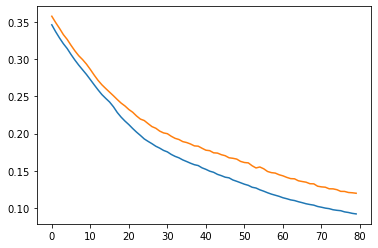

In [172]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


#### It also uses the plot_decision_regions function from the mlxtend library to visualize the decision regions of the model based on the features in the dataset.

In [173]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

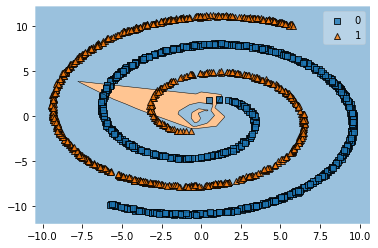

In [174]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

### Overall, this code defines, trains, and evaluates a neural network model for a binary classification problem, and it provides visualizations of the training process and decision regions of the model.

<AxesSubplot:>

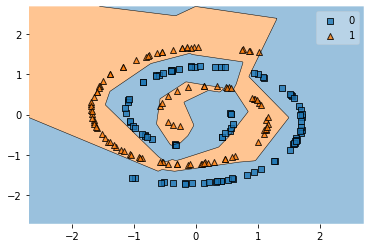

In [175]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)